Data Overview:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2051 entries, 2024-12-26 to 2025-03-12
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   open         2051 non-null   float64
 1   high         2051 non-null   float64
 2   low          2051 non-null   float64
 3   close        2051 non-null   float64
 4   volume       2051 non-null   int64  
 5   Symbol       2051 non-null   object 
 6   MA_10        2051 non-null   float64
 7   MA_50        2051 non-null   float64
 8   RSI          2051 non-null   float64
 9   MACD         2051 non-null   float64
 10  Signal_Line  2051 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 192.3+ KB
None

First 5 rows:
              open    high       low   close    volume Symbol    MA_10  \
2024-12-26  258.19  260.10  257.6300  259.02  27262983   AAPL  252.543   
2024-12-27  257.83  258.70  253.0600  255.59  42355321   AAPL  253.306   
2024-12-

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

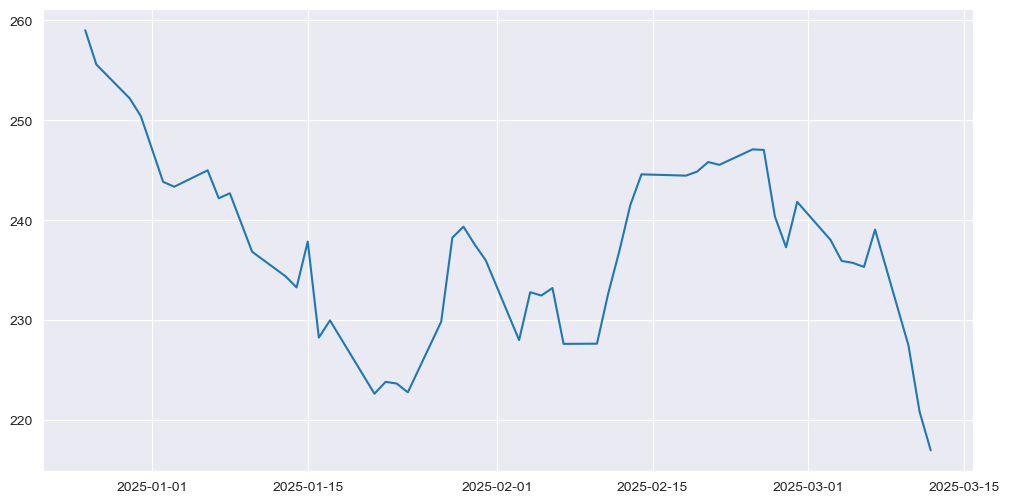

In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import date2num  # Import to convert dates for fill_between

# Set paths
processed_data_path = "/Users/uttakarsh/Desktop/StockMarketPrediction/data/processed/processed_data.csv"
reports_path = "/Users/uttakarsh/Desktop/StockMarketPrediction/reports/classical_ml"

# Create reports directory if it doesn't exist
os.makedirs(reports_path, exist_ok=True)

# Load processed data
df = pd.read_csv(processed_data_path, index_col=0, parse_dates=True)

# Display basic information about the data
print("Data Overview:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Use the full list of desired stock symbols instead of unique symbols from the file
desired_symbols = [
    "AAPL", "MSFT", "GOOGL", "AMZN", "FB", "TSLA", "BRK.A", "NVDA", "V", "JNJ",
    "WMT", "PYPL", "BABA", "DIS", "NFLX", "BA", "INTC", "KO", "GS", "CVX",
    "XOM", "AMD", "MA", "CSCO", "PEP", "PFE", "MCD", "WFC", "UNH", "ABT",
    "IBM", "GE", "INTU", "T", "CVS", "ATVI", "NEE", "CAT", "HD", "ADBE",
    "VZ", "ORCL", "LMT", "MMM", "SPGI", "RTX", "SQ", "MDT", "AXP", "USB",
    "HSBC", "TM", "SBUX", "COP", "HUM"
]
print(f"\nStocks to analyze: {desired_symbols}")

# Helper function: Ensure selected columns are numeric.
def ensure_numeric(symbol_df, cols):
    for col in cols:
        symbol_df[col] = pd.to_numeric(symbol_df[col], errors='coerce')
    return symbol_df

# Analyze stock trends
def plot_stock_trends(df, symbol, save_path):
    symbol_df = df[df['Symbol'] == symbol].copy()  # Make an explicit copy
    if symbol_df.empty:
        print(f"No data for {symbol}")
        return
    plt.figure(figsize=(12, 6))
    plt.plot(symbol_df.index, symbol_df['close'], label='Close Price')
    plt.plot(symbol_df.index, symbol_df['MA_10'], label='10-Day MA')
    plt.plot(symbol_df.index, symbol_df['MA_50'], label='50-Day MA')
    plt.title(f"Stock Trends for {symbol}")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid()
    plt.savefig(os.path.join(save_path, f"{symbol}_trends.png"))
    plt.close()  # Free memory

# Analyze correlations
def plot_correlation_heatmap(df, symbol, save_path):
    symbol_df = df[df['Symbol'] == symbol].copy()
    if symbol_df.empty:
        print(f"No data for {symbol}")
        return
    # Convert required columns to numeric
    cols = ['close', 'MA_10', 'MA_50', 'RSI', 'MACD', 'Signal_Line']
    symbol_df = ensure_numeric(symbol_df, cols)
    correlation_matrix = symbol_df[cols].corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f"Correlation Heatmap for {symbol}")
    plt.savefig(os.path.join(save_path, f"{symbol}_correlation.png"))
    plt.close()  # Free memory

# Visualize stock performance over time
def plot_stock_performance(df, symbol, save_path):
    symbol_df = df[df['Symbol'] == symbol].copy()
    if symbol_df.empty:
        print(f"No data for {symbol}")
        return
    plt.figure(figsize=(12, 6))
    # Plot close price normally (plt.plot handles datetime x-values)
    plt.plot(symbol_df.index, symbol_df['close'], label='Close Price')
    # Convert datetime index to numeric for fill_between
    x_numeric = date2num(symbol_df.index.to_pydatetime())
    plt.fill_between(x_numeric, symbol_df['close'], alpha=0.3)
    # Convert x-axis back to dates
    plt.gca().xaxis_date()
    plt.title(f"Stock Performance for {symbol}")
    plt.xlabel("Date")
    plt.ylabel("Close Price")
    plt.legend()
    plt.grid()
    plt.savefig(os.path.join(save_path, f"{symbol}_performance.png"))
    plt.close()  # Free memory

# Identify patterns and anomalies
def plot_rsi_macd(df, symbol, save_path):
    symbol_df = df[df['Symbol'] == symbol].copy()
    if symbol_df.empty:
        print(f"No data for {symbol}")
        return
    # Ensure RSI, MACD, and Signal_Line are numeric
    cols = ['RSI', 'MACD', 'Signal_Line']
    symbol_df = ensure_numeric(symbol_df, cols)
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
    ax1.plot(symbol_df.index, symbol_df['RSI'], label='RSI', color='orange')
    ax1.axhline(70, color='red', linestyle='--', label='Overbought (70)')
    ax1.axhline(30, color='green', linestyle='--', label='Oversold (30)')
    ax1.set_title(f"RSI and MACD for {symbol}")
    ax1.set_ylabel("RSI")
    ax1.legend()
    ax1.grid()

    ax2.plot(symbol_df.index, symbol_df['MACD'], label='MACD', color='blue')
    ax2.plot(symbol_df.index, symbol_df['Signal_Line'], label='Signal Line', color='red')
    ax2.set_ylabel("MACD")
    ax2.legend()
    ax2.grid()

    plt.savefig(os.path.join(save_path, f"{symbol}_rsi_macd.png"))
    plt.close()  # Free memory

# Perform EDA for each desired stock symbol
for symbol in desired_symbols:
    print(f"\nAnalyzing {symbol}...")
    plot_stock_trends(df, symbol, reports_path)
    plot_correlation_heatmap(df, symbol, reports_path)
    plot_stock_performance(df, symbol, reports_path)
    plot_rsi_macd(df, symbol, reports_path)

print("EDA completed. Visualizations saved to reports/classical_ml/.")
